In [26]:
# data prepare
import trimesh

faces_list = [
    '../../static/example/face1.obj',
    '../../static/example/face2.obj',
    '../../static/example/face3.obj',
    '../../static/example/face4.obj',
]

def load_mesh(path: str) -> trimesh.Trimesh:
    _msh = trimesh.load_mesh(path)
    _msh.fill_holes()
    _msh.remove_duplicate_faces()
    return _msh

tooth_meshes = [
    load_mesh(_face) for _face in faces_list
]

In [27]:
# convert unsmesh to strmesh for face-1
import sys 
sys.path.append("../../libs")
from uns2str import Uns2Str

str_mesh_f1 = Uns2Str().convert(tooth_meshes[0])
tooth_meshes[0] = str_mesh_f1

remeshing: 100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


In [47]:
# compute nearest dist for vertices in face1
import numpy as np

def compute_nearest(tidx: int) -> np.array:
    template_vts = tooth_meshes[0].vertices
    _shape = int(np.sqrt(len(template_vts)))
    ndists = tooth_meshes[tidx].nearest.signed_distance(template_vts)
    ndists = np.absolute(ndists).reshape(_shape, _shape)
    return ndists

f2_ndists = compute_nearest(1)
f3_ndists = compute_nearest(2)
f4_ndists = compute_nearest(3)

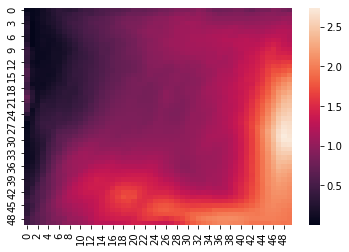

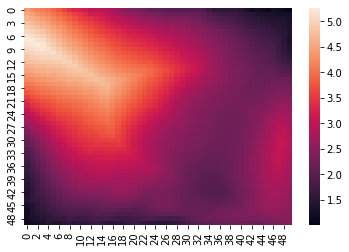

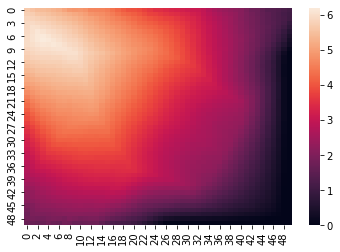

In [52]:
# show heatmap
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(f2_ndists)
plt.show()

ax = sns.heatmap(f3_ndists)
plt.show()

ax = sns.heatmap(f4_ndists)
plt.show()